# hw2: Решающие деревья

*Спасибо великому курсу великого Евгения Соколова*

Выполнила: Кудаева Вика М8О-310Б-23

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплементацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

Все данные, на которых будут обучаться модели, вы можете найти на диске.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Неэффективная и/или неоригинальная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Заполненный ноутбук ```hw2-trees.ipynb``` и модуль с реализованными функциями и классами ```hw2code.py``` необходимо загрузить на свой Github. Затем нужно оставить комментарий в Google-таблице с оценками в столбце <<hw2>> в строке со своей фамилией о том, что вы выполнили работу с указанием ника на Kaggle. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [4]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [5]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

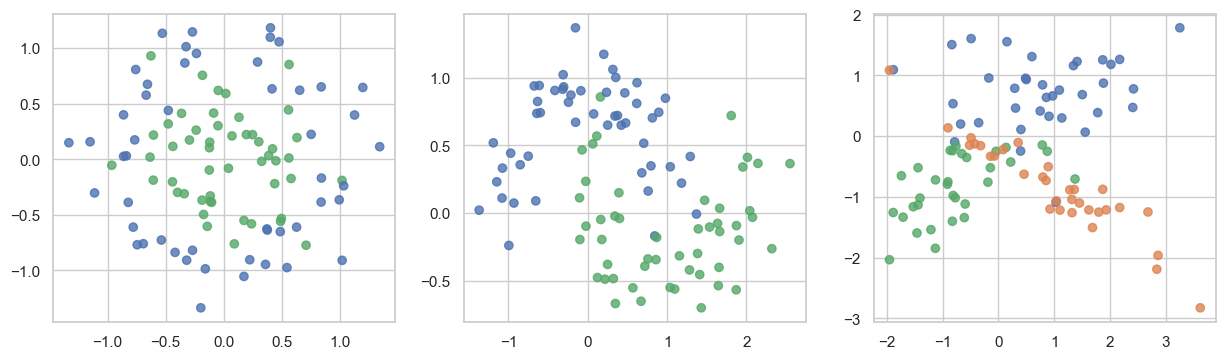

In [6]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [7]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

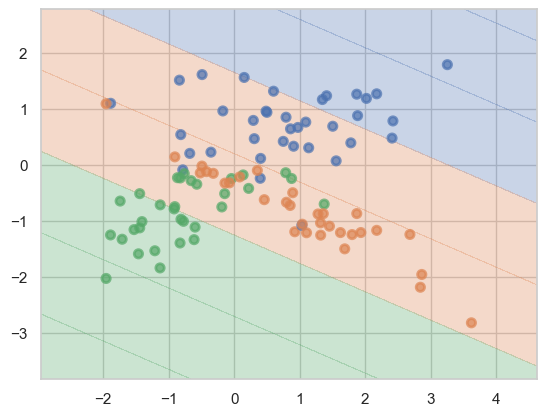

In [8]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

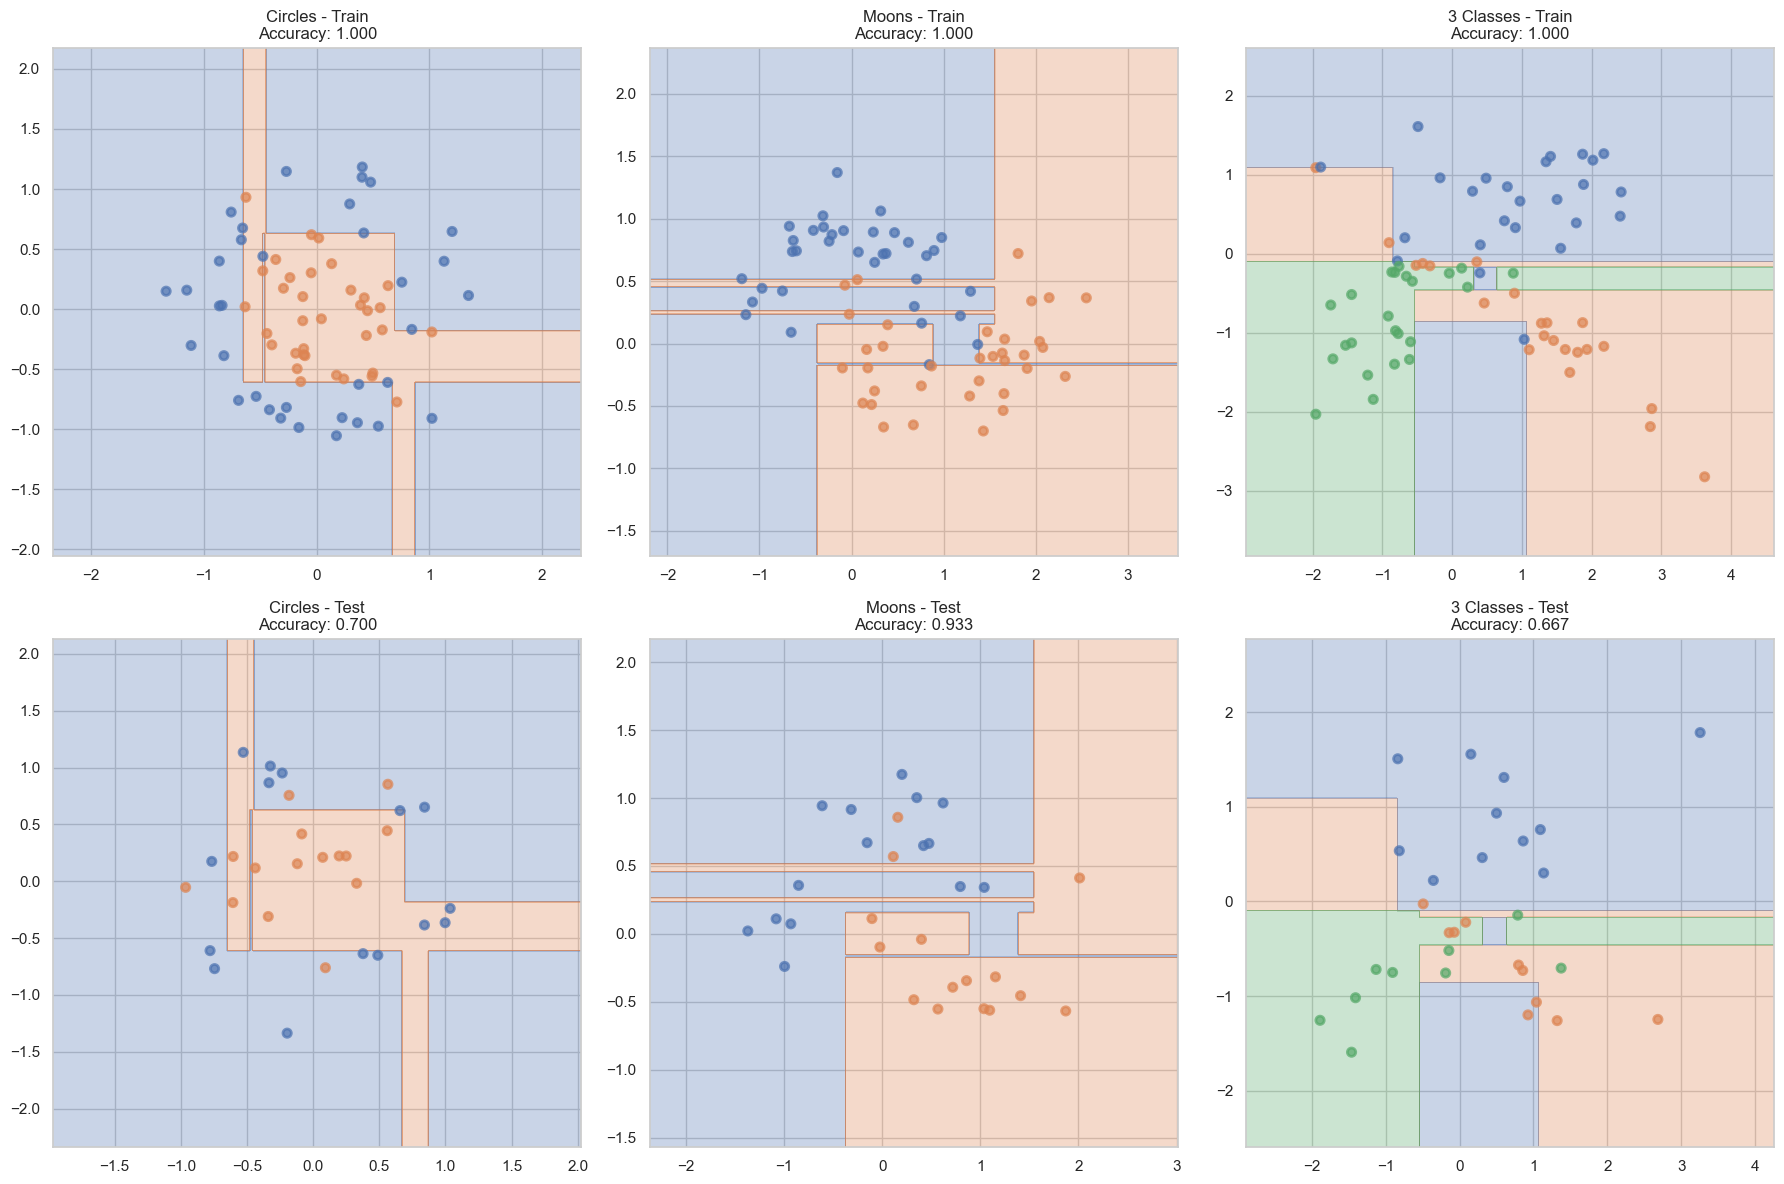

In [9]:

from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, 
                       class_sep=.8, random_state=3, n_redundant=0)
]

dataset_names = ['Circles', 'Moons', '3 Classes']
plt.figure(figsize=(18, 12))

for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    
    tree = DecisionTreeClassifier(random_state=42)
    tree.fit(X_train, y_train)
    
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    plt.subplot(2, 3, i + 1)
    plot_surface(tree, X_train, y_train)
    plt.title(f'{dataset_names[i]} - Train\nAccuracy: {train_accuracy:.3f}')
    
    plt.subplot(2, 3, i + 4)
    plot_surface(tree, X_test, y_test)
    plt.title(f'{dataset_names[i]} - Test\nAccuracy: {test_accuracy:.3f}')

plt.tight_layout()
plt.show()

__Ответ:__ Из графиков видно, что деревья значительно переобучились. На всех трех датасетах они достигли идеальной 100% точности на обучающих данных, что свидетельствует о полном запоминании тренировочной выборки. При этом на тестовых данных точность существенно ниже. Деревья переобучились из-за избыточной сложности моделей, которые без ограничений на глубину полностью запоминают тренировочные данные вместо выявления общих закономерностей. В датасете Circles это проявилось в неудачной аппроксимации круговых границ прямоугольными областями, а в задаче 3 Classes усугубилось необходимостью построения сложных многоклассовых разделений.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?


ДАТАСЕТ: Circles



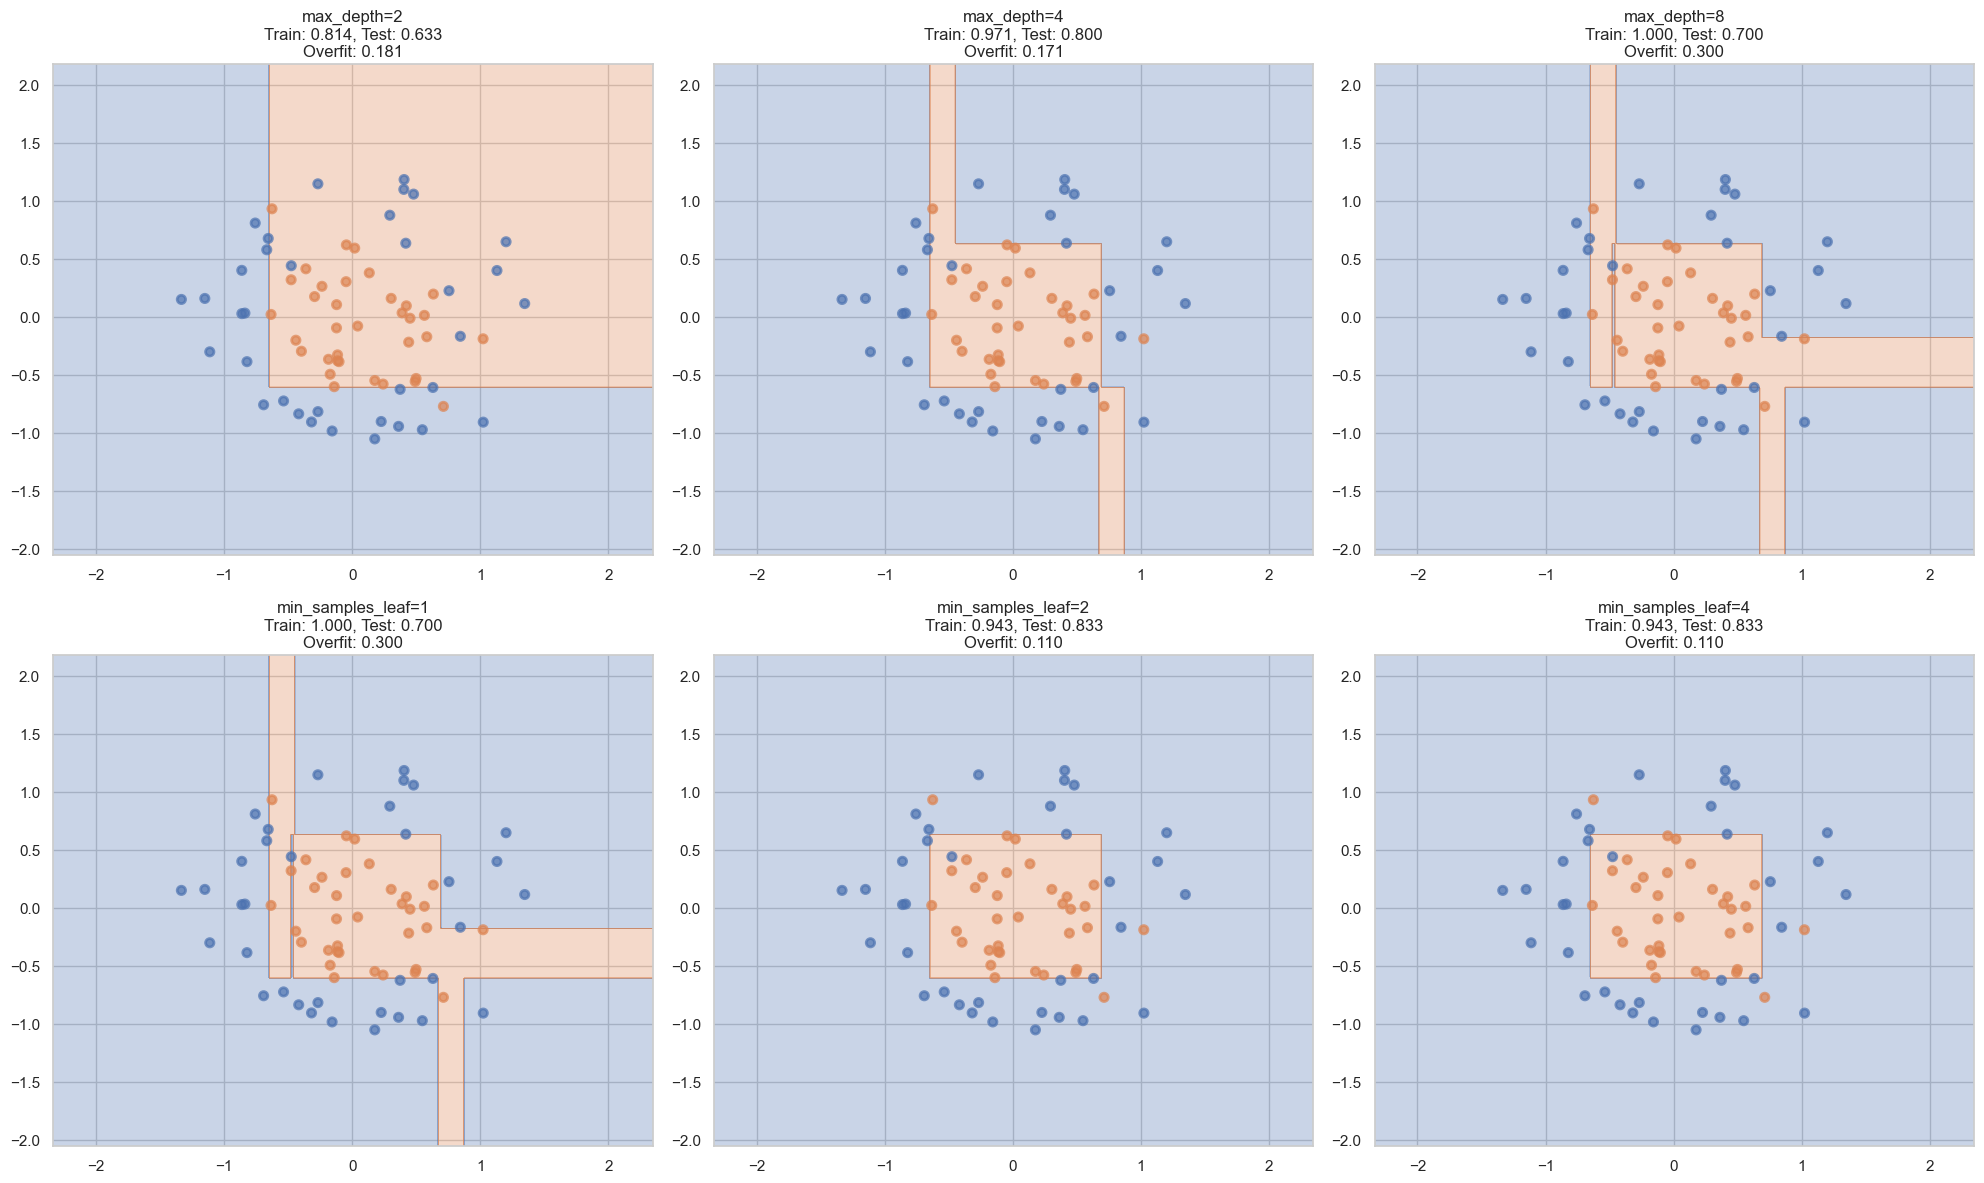


ДАТАСЕТ: Moons



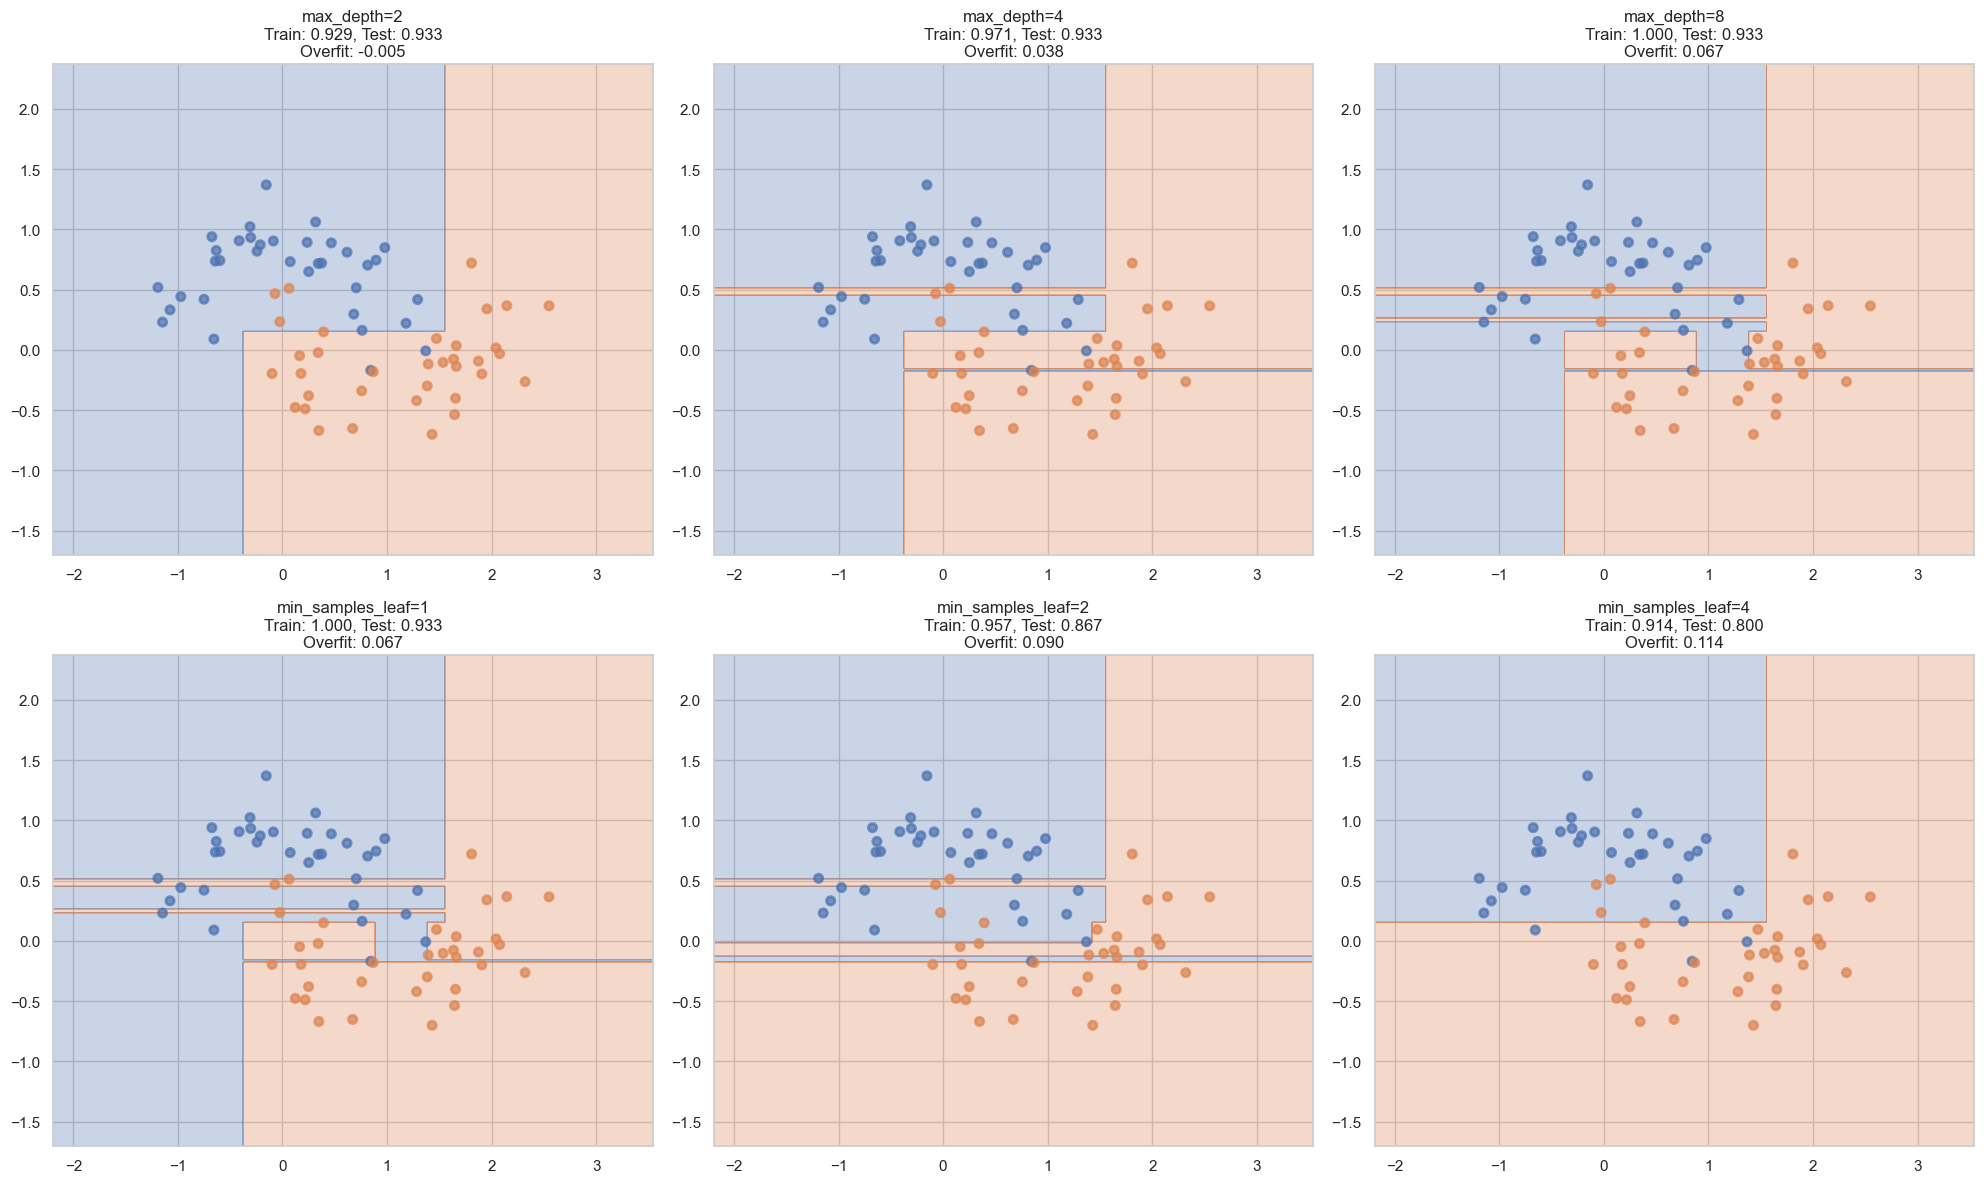


ДАТАСЕТ: 3 Classes



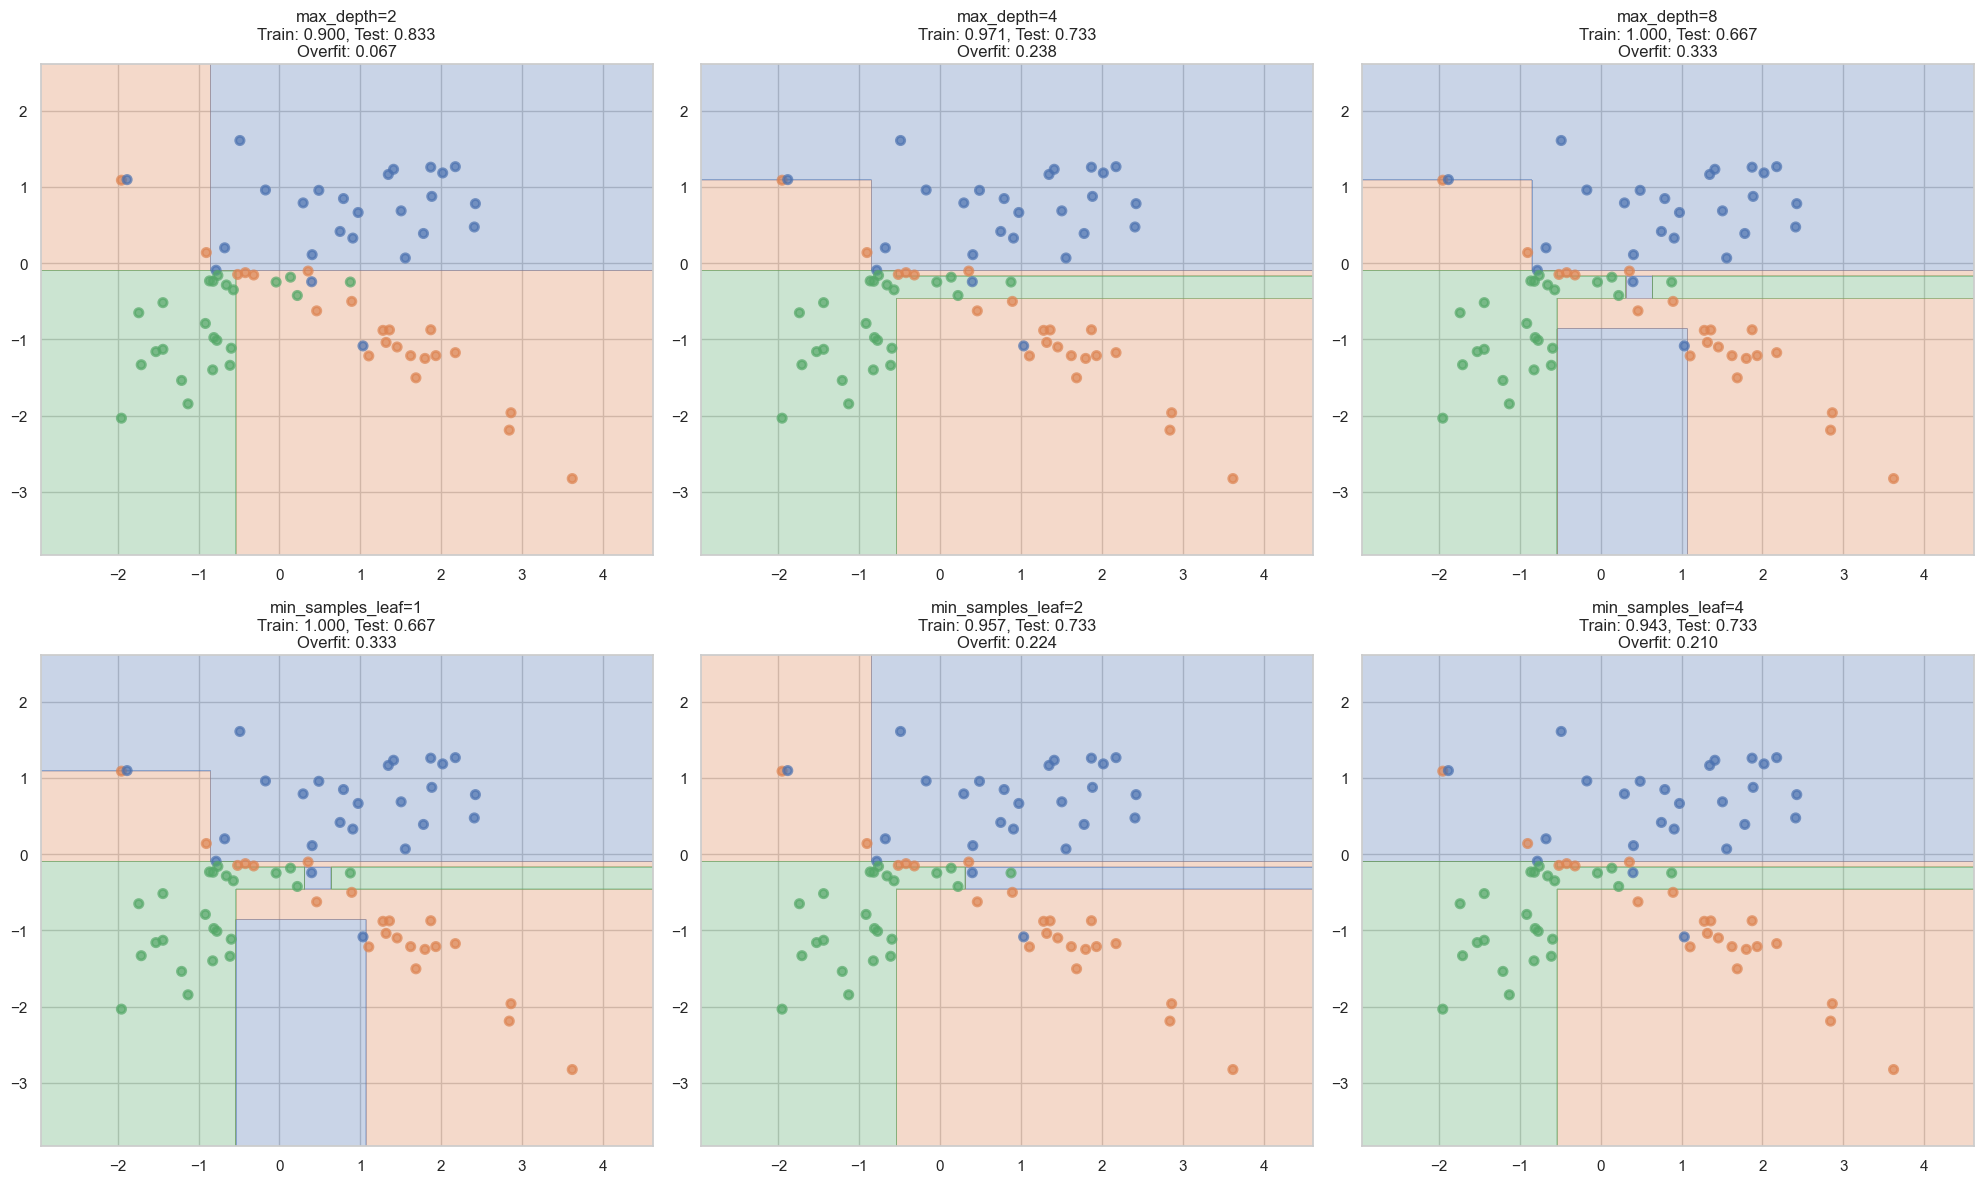

In [10]:
def get_fixed_split(X, y):
    return train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

hyperparameters = [
    {'max_depth': 2, 'min_samples_leaf': 1}, 
    {'max_depth': 4, 'min_samples_leaf': 1}, 
    {'max_depth': 8, 'min_samples_leaf': 1},
    {'max_depth': None, 'min_samples_leaf': 1},
    {'max_depth': None, 'min_samples_leaf': 2},
    {'max_depth': None, 'min_samples_leaf': 4}
]

param_names = [
    "max_depth=2",
    "max_depth=4", 
    "max_depth=8",
    "min_samples_leaf=1",
    "min_samples_leaf=2",
    "min_samples_leaf=4"
]

for dataset_idx, (X, y) in enumerate(datasets):
    print(f"\nДАТАСЕТ: {dataset_names[dataset_idx]}\n")
    X_train, X_test, y_train, y_test = get_fixed_split(X, y)
    plt.figure(figsize=(20, 12))
    
    for param_idx, params in enumerate(hyperparameters):
        tree = DecisionTreeClassifier(**params, random_state=42)
        tree.fit(X_train, y_train)
        
        train_acc = tree.score(X_train, y_train)
        test_acc = tree.score(X_test, y_test)
        overfitting = train_acc - test_acc
        
        plt.subplot(2, 3, param_idx + 1)
        plot_surface(tree, X_train, y_train)
        plt.title(f'{param_names[param_idx]}\nTrain: {train_acc:.3f}, Test: {test_acc:.3f}\nOverfit: {overfitting:.3f}')
        
    plt.tight_layout()
    plt.show()

__Ответ:__ При max_depth=2 все датасеты показывают хорошее обобщение с минимальным переобучением, но на Circles это приводит к недостаточной точности. С увеличением глубины до 4 и 8 модель Circles сильно переобучается, в то время как Moons сохраняет высокое качество на тесте. Параметр min_samples_leaf=2 дает наилучший результат для Circles, улучшая тестовую точность до 0.833, но для Moons эти же настройки ухудшают качество. В датасете 3 Classes максимальная глубина вызывает сильное переобучение, а ограничения через min_samples_leaf лишь немного улучшают ситуацию. Таким образом, каждый датасет требует индивидуального подхода.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw2code.py

done ✅

__Задание 4. (0.5 балла)__

Загрузите таблицу students.csv (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

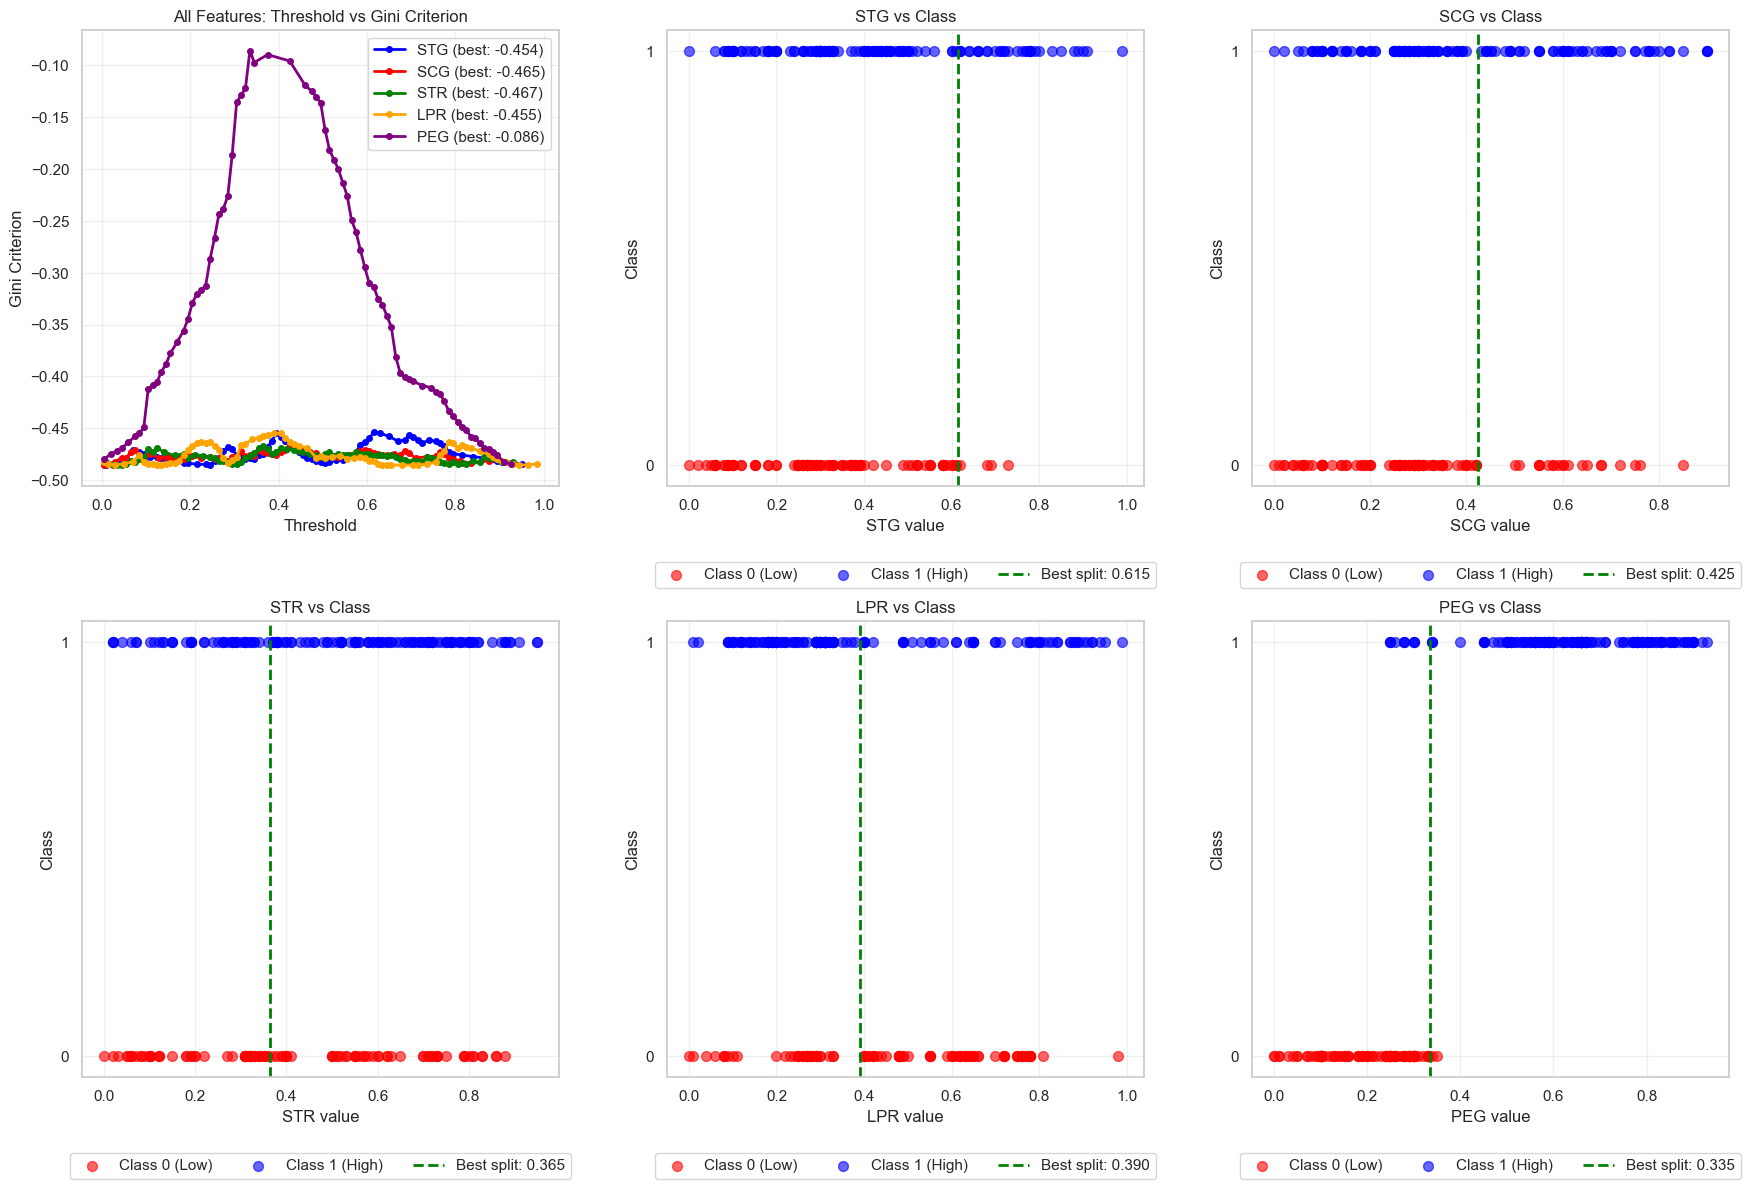

In [17]:
from hw2code import find_best_split


data = pd.read_csv('students.csv')

X = data[['STG', 'SCG', 'STR', 'LPR', 'PEG']].values
y = data['UNS'].values

feature_names = ['STG', 'SCG', 'STR', 'LPR', 'PEG']

plt.figure(figsize=(18, 12))

colors = ['blue', 'red', 'green', 'orange', 'purple']

plt.subplot(2, 3, 1)
for i, feature_name in enumerate(feature_names):
    feature_vector = X[:, i]
    thresholds, ginis, best_threshold, best_gini = find_best_split(feature_vector, y)
    
    if len(thresholds) > 0:
        plt.plot(thresholds, ginis, 'o-', linewidth=2, color=colors[i], 
                label=f'{feature_name} (best: {best_gini:.3f})', markersize=4)

plt.xlabel('Threshold')
plt.ylabel('Gini Criterion')
plt.title('All Features: Threshold vs Gini Criterion')
plt.legend()
plt.grid(True, alpha=0.3)

for i, feature_name in enumerate(feature_names):
    feature_vector = X[:, i]
    plt.subplot(2, 3, i + 2)
    
    plt.scatter(feature_vector[y == 0], y[y == 0], 
               alpha=0.6, label='Class 0 (Low)', color='red', s=50)
    plt.scatter(feature_vector[y == 1], y[y == 1], 
               alpha=0.6, label='Class 1 (High)', color='blue', s=50)
    
    thresholds, ginis, best_threshold, best_gini = find_best_split(feature_vector, y)
    if best_threshold is not None:
        plt.axvline(x=best_threshold, color='green', linestyle='--', 
                   linewidth=2, label=f'Best split: {best_threshold:.3f}')
    
    plt.xlabel(f'{feature_name} value')
    plt.ylabel('Class')
    plt.title(f'{feature_name} vs Class')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
    plt.grid(True, alpha=0.3)
    plt.yticks([0, 1])

plt.tight_layout()
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Исходя из кривых Джини, деление следует производить по признаку PEG, который имеет максимальное значение критерия (-0.086). Этот результат полностью согласуется с визуальной оценкой scatter-графиков, где PEG показывает хорошее разделение классов вокруг порога 0.4. Кривые наилучших признаков характеризуются выраженным пиком в точке оптимального разделения и высокими значениями Джини. Для признаков с плохим разделением кривые почти горизонтальны без четких экстремумов. Поэтому остальные признаки с минимальным значением Джини демонстрирует на scatter-графике сильное перекрытие классов, что подтверждает невозможность эффективного разделения.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw2code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

done ✅

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [6]:
from hw2code import DecisionTree
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [7]:
data = pd.read_csv('agaricus-lepiota.data', header=None)
print("Первые 5 строк исходного датасета:")
print(data.head())

y = data[0]
X = data.iloc[:, 1:]

label_encoders = {}
X_encoded = X.copy()

for col in X.columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col].astype(str).replace('?', 'missing'))
    label_encoders[col] = le

le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.5, random_state=42, stratify=y_encoded
)

print(f"\nРазмер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

feature_types = ['categorical'] * X_train.shape[1]
tree = DecisionTree(
    feature_types=feature_types,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1
)
tree.fit(X_train.values, y_train)

def get_tree_depth(node, current_depth=0):
    if node["type"] == "terminal":
        return current_depth
    left_depth = get_tree_depth(node["left_child"], current_depth + 1)
    right_depth = get_tree_depth(node["right_child"], current_depth + 1)
    return max(left_depth, right_depth)

tree_depth = get_tree_depth(tree._tree)
print(f"Глубина дерева: {tree_depth}")
print(f"Максимальная допустимая глубина: {tree._max_depth}")

y_pred = tree.predict(X_test.values)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Первые 5 строк исходного датасета:
  0  1  2  3  4  5  6  7  8  9   ... 13 14 15 16 17 18 19 20 21 22
0  p  x  s  n  t  p  f  c  n  k  ...  s  w  w  p  w  o  p  k  s  u
1  e  x  s  y  t  a  f  c  b  k  ...  s  w  w  p  w  o  p  n  n  g
2  e  b  s  w  t  l  f  c  b  n  ...  s  w  w  p  w  o  p  n  n  m
3  p  x  y  w  t  p  f  c  n  n  ...  s  w  w  p  w  o  p  k  s  u
4  e  x  s  g  f  n  f  w  b  k  ...  s  w  w  p  w  o  e  n  a  g

[5 rows x 23 columns]

Размер обучающей выборки: (4062, 22)
Размер тестовой выборки: (4062, 22)
Глубина дерева: 7
Максимальная допустимая глубина: 10
Accuracy: 1.0000


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

Первые 5 строк tic-tac-toe:
  V1 V2 V3 V4 V5 V6 V7 V8 V9       V10
0  x  x  x  x  o  o  x  o  o  positive
1  x  x  x  x  o  o  o  x  o  positive
2  x  x  x  x  o  o  o  o  x  positive
3  x  x  x  x  o  o  o  b  b  positive
4  x  x  x  x  o  o  b  o  b  positive

Размер датасета: (958, 10)
Распределение классов: V10
positive    626
negative    332
Name: count, dtype: int64


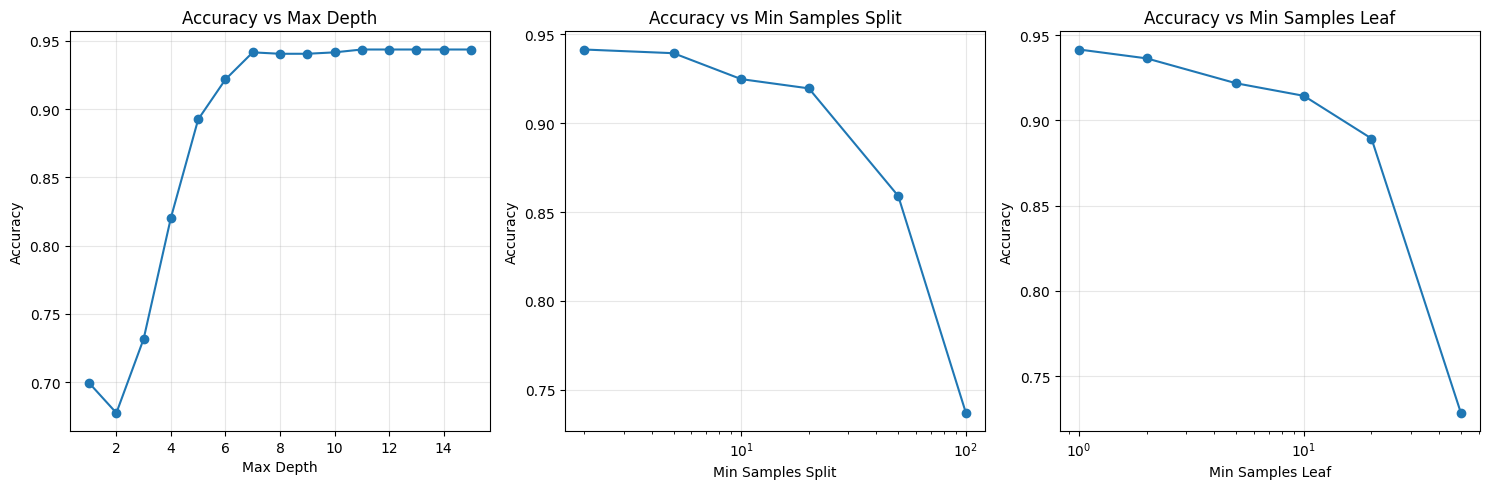

In [8]:
def custom_cross_val_score(estimator, X, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        tree = DecisionTree(
            feature_types=estimator._feature_types,
            max_depth=estimator._max_depth,
            min_samples_split=estimator._min_samples_split,
            min_samples_leaf=estimator._min_samples_leaf
        )
        tree.fit(X_train, y_train)
        y_pred = tree.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        scores.append(score)

    return np.array(scores)

def load_tic_tac_toe():
    data = pd.read_csv('tic-tac-toe-endgame.csv')
    print("Первые 5 строк tic-tac-toe:")
    print(data.head())
    print(f"\nРазмер датасета: {data.shape}")
    print(f"Распределение классов: {data.iloc[:, -1].value_counts()}")

    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]

    le = LabelEncoder()
    X_encoded = X.apply(lambda col: le.fit_transform(col))
    y_encoded = le.fit_transform(y)

    return X_encoded.values, y_encoded


X_ttt, y_ttt = load_tic_tac_toe()

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
max_depths = range(1, 16)
accuracies_depth = []

for depth in max_depths:
    tree = DecisionTree(feature_types=['categorical'] * X_ttt.shape[1],
                        max_depth=depth,
                        min_samples_split=2,
                        min_samples_leaf=1)
    scores = custom_cross_val_score(tree, X_ttt, y_ttt, cv=5)
    accuracies_depth.append(scores.mean())

plt.plot(max_depths, accuracies_depth, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
min_splits = [2, 5, 10, 20, 50, 100]
accuracies_split = []

for min_split in min_splits:
    tree = DecisionTree(feature_types=['categorical'] * X_ttt.shape[1],
                        max_depth=10,
                        min_samples_split=min_split,
                        min_samples_leaf=1)
    scores = custom_cross_val_score(tree, X_ttt, y_ttt, cv=5)
    accuracies_split.append(scores.mean())

plt.plot(min_splits, accuracies_split, marker='o')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Min Samples Split')
plt.grid(True, alpha=0.3)
plt.xscale('log')

plt.subplot(1, 3, 3)
min_leaves = [1, 2, 5, 10, 20, 50]
accuracies_leaf = []

for min_leaf in min_leaves:
    tree = DecisionTree(feature_types=['categorical'] * X_ttt.shape[1],
                        max_depth=10,
                        min_samples_split=2,
                        min_samples_leaf=min_leaf)
    scores = custom_cross_val_score(tree, X_ttt, y_ttt, cv=5)
    accuracies_leaf.append(scores.mean())

plt.plot(min_leaves, accuracies_leaf, marker='o')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Min Samples Leaf')
plt.grid(True, alpha=0.3)
plt.xscale('log')

plt.tight_layout()
plt.show()

best_depth = max_depths[np.argmax(accuracies_depth)]
best_split = min_splits[np.argmax(accuracies_split)]
best_leaf = min_leaves[np.argmax(accuracies_leaf)]


__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

def load_mushrooms():
    data = pd.read_csv('agaricus-lepiota.data', header=None)
    y = data[0]
    X = data.iloc[:, 1:]

    le = LabelEncoder()
    X_encoded = X.apply(lambda col: le.fit_transform(col.astype(str).replace('?', 'missing')))
    y_encoded = le.fit_transform(y)

    return X_encoded.values, y_encoded


def load_tic_tac_toe():
    data = pd.read_csv('tic-tac-toe-endgame.csv')
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]

    le = LabelEncoder()
    X_encoded = X.apply(lambda col: le.fit_transform(col))
    y_encoded = le.fit_transform(y)

    return X_encoded.values, y_encoded


def load_cars():
    data = pd.read_csv('car.data', header=None)
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]

    le = LabelEncoder()
    X_encoded = X.apply(lambda col: le.fit_transform(col))
    y_encoded = le.fit_transform(y)

    y_binary = np.where(y_encoded <= 1, 0, 1)
    return X_encoded.values, y_binary


def load_nursery():
    data = pd.read_csv('nursery.data', header=None)
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]

    le = LabelEncoder()
    X_encoded = X.apply(lambda col: le.fit_transform(col))
    y_encoded = le.fit_transform(y)

    y_binary = np.where(y_encoded <= 1, 0, 1)
    return X_encoded.values, y_binary


def compare_algorithms(X, y, dataset_name):
    results = {}
    tree_real = DecisionTree(feature_types=['real'] * X.shape[1],
                             max_depth=10, min_samples_split=2, min_samples_leaf=1)
    scores_real = custom_cross_val_score(tree_real, X, y, cv=10)
    results['Our Tree (real)'] = scores_real.mean()

    tree_cat = DecisionTree(feature_types=['categorical'] * X.shape[1],
                            max_depth=10, min_samples_split=2, min_samples_leaf=1)
    scores_cat = custom_cross_val_score(tree_cat, X, y, cv=10)
    results['Our Tree (categorical)'] = scores_cat.mean()

    try:
        encoder = OneHotEncoder(sparse_output=False)
    except TypeError:
        encoder = OneHotEncoder(sparse=False)

    X_onehot = encoder.fit_transform(X)
    tree_onehot = DecisionTree(feature_types=['real'] * X_onehot.shape[1],
                               max_depth=10, min_samples_split=2, min_samples_leaf=1)
    scores_onehot = custom_cross_val_score(tree_onehot, X_onehot, y, cv=10)
    results['Our Tree (one-hot)'] = scores_onehot.mean()

    sklearn_tree = DecisionTreeClassifier(random_state=42, max_depth=10)
    scores_sklearn = cross_val_score(sklearn_tree, X, y, cv=10,
                                     scoring=make_scorer(accuracy_score))
    results['Sklearn Tree'] = scores_sklearn.mean()

    return results


def main_comparison():

    datasets = {
        'mushrooms': load_mushrooms(),
        'tic-tac-toe': load_tic_tac_toe(),
        'cars': load_cars(),
        'nursery': load_nursery()
    }

    all_results = {}

    for name, (X, y) in datasets.items():
        results = compare_algorithms(X, y, name)
        all_results[name] = results

    results_df = pd.DataFrame(all_results).T

    print("\n" + "=" * 90)
    print("ИТОГОВАЯ ТАБЛИЦА:")
    print("=" * 90)
    print(results_df.round(4))
    print("=" * 90)

    return results_df


final_results = main_comparison()
final_results.to_csv('tree_comparison_results.csv')


ИТОГОВАЯ ТАБЛИЦА:
             Our Tree (real)  Our Tree (categorical)  Our Tree (one-hot)  Sklearn Tree
mushrooms             1.0000                  1.0000              1.0000        0.9567
tic-tac-toe           0.8810                  0.9395              0.9395        0.7748
cars                  0.9786                  0.9832              0.9734        0.8815
nursery               0.9645                  0.9758              0.9680        0.7198


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** Анализ эксперимента показал стабильное ранжирование алгоритмов: на всех четырех датасетах алгоритмы имеют одинаковый порядок по качеству. One-hot encoding стабильно работает хорошо, но немного хуже прямого категориального подхода. Трактовка категорий как вещественных признаков закономерно ухудшает производительность. Наименьшая эффективность sklearn объясняется менее оптимальной стратегией работы с категориальными данными. Компонента случайности присутствует в основном в разбиении данных и порядке кодирования категорий, что можно устранить фиксацией random_state и усреднением результатов. Таким образом, закономерность показывает, что правильная обработка категориальных признаков всегда дает лучший результат.

Вставьте что угодно, описывающее ваши впечатления от этого задания:

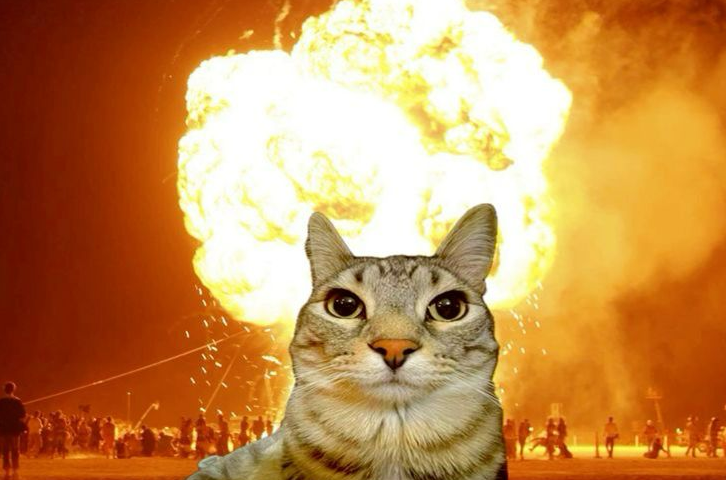